<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [1]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot     as plt
import seaborn  as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
ind = np.random.randint(1, 9245527, 4000000)

In [7]:
df_std = df.iloc[ind,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
8976649,1.0,2246454.0,1063119.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,B,F,...,2,202010,1,4100000.0,10,0.0,0.0,CALAMAR,33,4554326.00
1850511,1.0,4129178.0,0.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,201903,1,23500000.0,3,22057000.0,0.0,PEDRAZA,30,480312.00
3743573,1.0,2960000.0,0.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,E,F,...,3,202009,0,0.0,9,22529000.0,0.0,PUERRES,38,970942.00
3800901,1.0,3038000.0,0.0,PSICOLOGIA,UNIVERSITARIO,Empleado,6,SOLTERO,G,F,...,0,202002,0,0.0,2,12221000.0,0.0,VILLETA,28,378749.98
875657,1.0,1272000.0,1165594.0,INGENIERIA INDUSTRIAL,UNIVERSITARIO,Empleado,6,CASADO,H,M,...,1,202007,0,0.0,7,2502000.0,0.0,TOCANCIPA,36,365539.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420439,1.0,3854000.0,0.0,EDUCACION,TECNOLOGO,Empleado,6,CASADO,B,F,...,2,201908,0,0.0,8,91702000.0,0.0,PEDRAZA,49,171970.00
1309238,1.0,1784948.0,0.0,BIOLOGIA,ESPECIALIZACION,Estudiante,1,VIUDO,A,F,...,1,202003,0,0.0,3,0.0,0.0,PUERRES,39,578473.00
993030,2.0,8705000.0,0.0,VETERINARIA,UNIVERSITARIO,Independiente,8,SOLTERO,D,F,...,6,201910,0,0.0,10,1724000.0,0.0,PUERRES,27,496630.00
149329,1.0,2984000.0,2984000.0,ADMINISTRACION,TECNOLOGO,Empleado,6,UNION LIBRE,F,F,...,10,202005,0,0.0,5,84763000.0,0.0,ARBOLEDAS,41,798673.00


## One-Hot Encoding

In [8]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [9]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YARIMA,ciudad_residencia_YARUMAL,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
8976649,1.0,2246454.0,1063119.0,6,1,1,7,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1850511,1.0,4129178.0,0.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3743573,1.0,2960000.0,0.0,6,1,1,4,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3800901,1.0,3038000.0,0.0,6,1,1,2,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
875657,1.0,1272000.0,1165594.0,6,1,1,1,2,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420439,1.0,3854000.0,0.0,6,1,1,7,1,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1309238,1.0,1784948.0,0.0,1,1,1,8,1,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
993030,2.0,8705000.0,0.0,8,1,1,3,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
149329,1.0,2984000.0,2984000.0,6,1,1,6,1,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    5733830
dtype: int64

## Best Variables

In [11]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:31]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA']

In [12]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
                     'gasto_familiar']

In [13]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,edad,gasto_familiar,profesion_ADMINISTRACION,profesion_AGRONOMIA,profesion_ARQUITECTURA,profesion_ARTES,profesion_AUXILIAR CONTABLE,profesion_AUXILIAR DE ENFERMERIA,profesion_AUXILIAR DE ODONTOLOGIA,gasto_familiar
8976649,1.0,2246454.0,1063119.0,6,1,1,7,1,1.0,3.0,...,33,4554326.00,0,0,0,0,0,0,0,4554326.00
1850511,1.0,4129178.0,0.0,6,1,1,8,1,1.0,3.0,...,30,480312.00,0,0,0,0,0,0,0,480312.00
3743573,1.0,2960000.0,0.0,6,1,1,4,1,1.0,3.0,...,38,970942.00,0,0,0,0,0,0,0,970942.00
3800901,1.0,3038000.0,0.0,6,1,1,2,1,1.0,3.0,...,28,378749.98,0,0,0,0,0,0,0,378749.98
875657,1.0,1272000.0,1165594.0,6,1,1,1,2,5.0,3.0,...,36,365539.25,0,0,0,0,0,0,0,365539.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420439,1.0,3854000.0,0.0,6,1,1,7,1,5.0,1.0,...,49,171970.00,0,0,0,0,0,0,0,171970.00
1309238,1.0,1784948.0,0.0,1,1,1,8,1,2.0,5.0,...,39,578473.00,0,0,0,0,0,0,0,578473.00
993030,2.0,8705000.0,0.0,8,1,1,3,1,1.0,3.0,...,27,496630.00,0,0,0,0,0,0,0,496630.00
149329,1.0,2984000.0,2984000.0,6,1,1,6,1,4.0,1.0,...,41,798673.00,1,0,0,0,0,0,0,798673.00


## Normalization

In [14]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

To request implementation, send an email to feature_requests@modin.org.


,count,mean,std,min,25%,50%,75%,max
0,4000000.0,0.30,0.13,0.0,0.20,0.20,0.40,1.0
1,4000000.0,0.01,0.02,0.0,0.01,0.01,0.02,1.0
2,4000000.0,0.00,0.01,0.0,0.00,0.00,0.00,1.0
3,4000000.0,0.53,0.18,0.0,0.56,0.56,0.56,1.0
4,4000000.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,4000000.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,4000000.0,0.60,0.36,0.0,0.29,0.57,1.00,1.0
7,4000000.0,0.48,0.50,0.0,0.00,0.00,1.00,1.0
8,4000000.0,0.45,0.46,0.0,0.00,0.25,1.00,1.0
9,4000000.0,0.38,0.24,0.0,0.40,0.40,0.40,1.0


In [15]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [16]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 31)
(281666,)
(3718334,)


## Train_Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
1874237,0.6,0.037791,0.024744,0.555556,0.0,0.0,0.857143,1.0,0.00,0.8,...,0.0,0.310924,0.002573,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494075,0.4,0.018956,0.000000,0.000000,0.0,0.0,0.142857,0.0,0.00,0.6,...,0.0,0.294118,0.001903,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1846303,0.2,0.007345,0.000000,0.555556,0.0,0.0,1.000000,0.0,1.00,0.4,...,0.0,0.504202,0.004091,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817383,0.4,0.006692,0.000000,0.555556,0.0,0.0,0.857143,0.0,1.00,0.0,...,0.0,0.386555,0.002757,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1097590,0.4,0.013539,0.000000,0.777778,0.0,0.0,1.000000,1.0,1.00,0.6,...,0.0,0.436975,0.000420,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191553,0.6,0.041574,0.022527,0.555556,0.0,0.0,1.000000,1.0,0.00,0.4,...,0.0,0.243697,0.000655,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3168578,0.2,0.007719,0.004900,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,...,0.0,0.252101,0.000869,0.0,0.0,0.0,0.0,0.0,0.0,0.0
862272,0.2,0.004287,0.000000,0.555556,0.0,0.0,0.428571,0.0,0.00,0.4,...,0.0,0.260504,0.000499,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407210,0.4,0.005732,0.000000,0.555556,0.0,0.0,0.857143,1.0,1.00,0.4,...,0.0,0.277311,0.000048,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [19]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(32, input_dim=31, kernel_initializer='normal',activation='linear'))
model.add(Dense(64, kernel_initializer='normal',activation='linear'))
model.add(Dense(30, kernel_initializer='normal',activation='linear'))
model.add(Dense(15, kernel_initializer='normal',activation='linear'))
model.add(Dense(7, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 5,671
Trainable params: 5,671
Non-trainable params: 0
______________________________________________________

In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [22]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [23]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

34860/34860 [==============================] - 26s 745us/step - loss: 1.4335e-07 - mean_absolute_percentage_error: 19114.2559
loss :  1.4335185483105306e-07
mean_absolute_percentage_error :  19114.255859375


## Submission

In [24]:
y_hat = model.predict(x_val)
y_hat

array([[-4.6954898e-05],
       [-3.9196922e-05],
       [ 5.8214512e-04],
       ...,
       [ 7.2364567e-04],
       [ 1.1161924e-03],
       [ 3.2439208e-04]], dtype=float32)

In [25]:
y_val

array([2.48730211e-04, 6.52088439e-05, 7.77558030e-04, ...,
       8.77633283e-04, 1.41139683e-03, 5.61950024e-04])

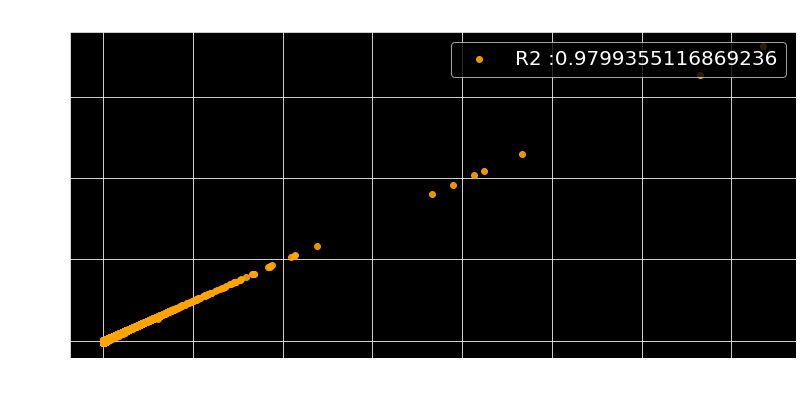

In [26]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 0 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right'
           )
plt.show()

In [27]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.2,0.002177,0.001888,0.555556,0.0,0.0,1.000000,0.0,1.00,0.0,...,0.386555,0.000249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000047
1,0.2,0.002524,0.000000,0.000000,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.184874,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000039
2,0.4,0.002953,0.000000,0.555556,0.0,0.0,0.142857,0.0,0.00,0.4,...,0.403361,0.000778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000582
3,0.4,0.008627,0.000000,0.777778,0.0,0.0,0.428571,1.0,0.00,0.4,...,0.428571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000253
4,0.2,0.004638,0.003405,0.555556,0.0,0.0,0.000000,1.0,0.00,0.0,...,0.243697,0.000353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.2,0.011323,0.000000,0.555556,0.0,0.0,0.857143,0.0,1.00,0.0,...,0.411765,0.000304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000050
281662,0.2,0.005244,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.25,0.8,...,0.327731,0.001022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000795
281663,0.4,0.025575,0.000000,0.777778,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.226891,0.000878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000724
281664,0.2,0.008767,0.006988,0.555556,0.0,0.0,0.714286,0.0,0.75,0.0,...,0.344538,0.001411,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001116


In [28]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         -26570.563479
1         -22180.525718
2         329420.882830
3        -143369.757744
4          76822.317589
              ...      
281661    -28521.757249
281662    450010.408840
281663    409492.390288
281664    631624.460399
281665    183565.097107
Name: 31, Length: 281666, dtype: float64

In [29]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,-26570.563479
1,12598#201902,-22180.525718
2,23697#201902,329420.882830
3,23768#201902,-143369.757744
4,7174#201902,76822.317589
...,...,...
281661,8596193#202011,-28521.757249
281662,8616083#202011,450010.408840
281663,8670207#202011,409492.390288
281664,8677655#202011,631624.460399


In [30]:
n = 90
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN90.csv'

In [31]:
np.mean(sub['gasto_familiar'])

579307.6481920207

In [32]:
sub.to_csv(sub_name, index=False)

# Test 1

In [33]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

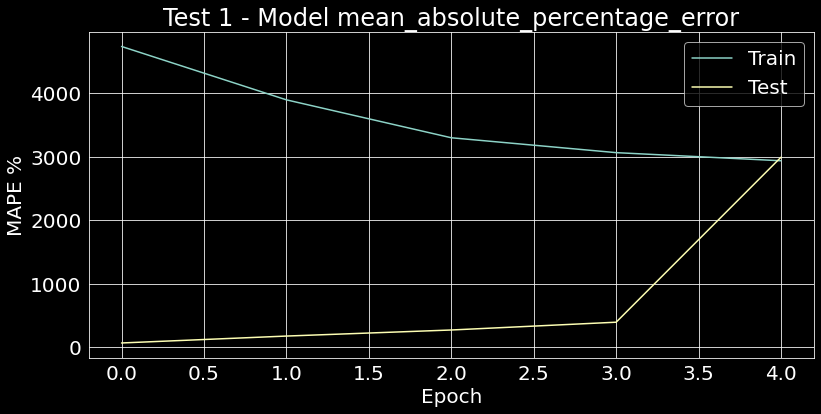

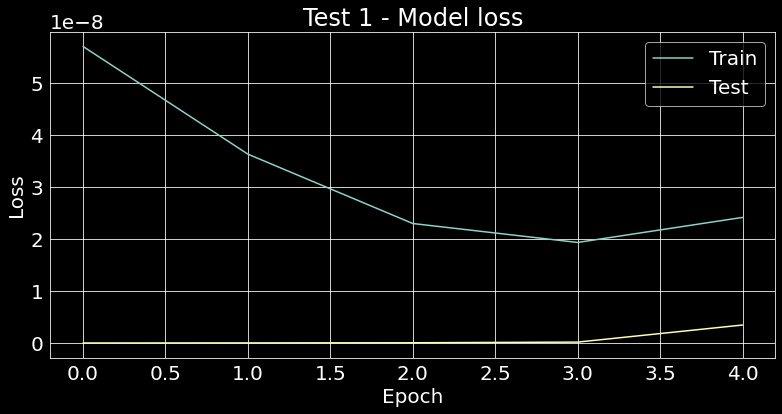

In [34]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 1 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 1 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [35]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

34860/34860 [==============================] - 26s 743us/step - loss: 3.4636e-09 - mean_absolute_percentage_error: 2984.0002
loss :  3.4636287171707636e-09
mean_absolute_percentage_error :  2984.000244140625


# Submission

In [36]:
y_hat = model.predict(x_val)
y_hat

array([[2.1434884e-04],
       [3.5815639e-05],
       [7.4033969e-04],
       ...,
       [8.4808900e-04],
       [1.3705917e-03],
       [5.2370928e-04]], dtype=float32)

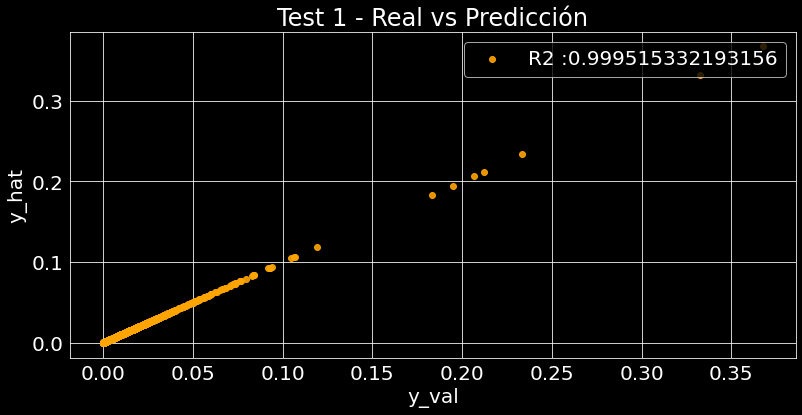

In [37]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 1 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [38]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.2,0.002177,0.001888,0.555556,0.0,0.0,1.000000,0.0,1.00,0.0,...,0.386555,0.000249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000214
1,0.2,0.002524,0.000000,0.000000,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.184874,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000036
2,0.4,0.002953,0.000000,0.555556,0.0,0.0,0.142857,0.0,0.00,0.4,...,0.403361,0.000778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000740
3,0.4,0.008627,0.000000,0.777778,0.0,0.0,0.428571,1.0,0.00,0.4,...,0.428571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000028
4,0.2,0.004638,0.003405,0.555556,0.0,0.0,0.000000,1.0,0.00,0.0,...,0.243697,0.000353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.2,0.011323,0.000000,0.555556,0.0,0.0,0.857143,0.0,1.00,0.0,...,0.411765,0.000304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000266
281662,0.2,0.005244,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.25,0.8,...,0.327731,0.001022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000982
281663,0.4,0.025575,0.000000,0.777778,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.226891,0.000878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000848
281664,0.2,0.008767,0.006988,0.555556,0.0,0.0,0.714286,0.0,0.75,0.0,...,0.344538,0.001411,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001371


In [39]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         121294.469612
1          20267.145014
2         418939.102271
3         -15805.796025
4         185530.404901
              ...      
281661    150675.255415
281662    555734.096565
281663    479911.651323
281664    775582.428723
281665    296353.553585
Name: 31, Length: 281666, dtype: float64

In [40]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,121294.469612
1,12598#201902,20267.145014
2,23697#201902,418939.102271
3,23768#201902,-15805.796025
4,7174#201902,185530.404901
...,...,...
281661,8596193#202011,150675.255415
281662,8616083#202011,555734.096565
281663,8670207#202011,479911.651323
281664,8677655#202011,775582.428723


In [41]:
n = 91
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN91.csv'

In [42]:
np.mean(sub['gasto_familiar'])

746583.3682709865

In [43]:
sub.to_csv(sub_name, index=False)

# Test 2

In [44]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


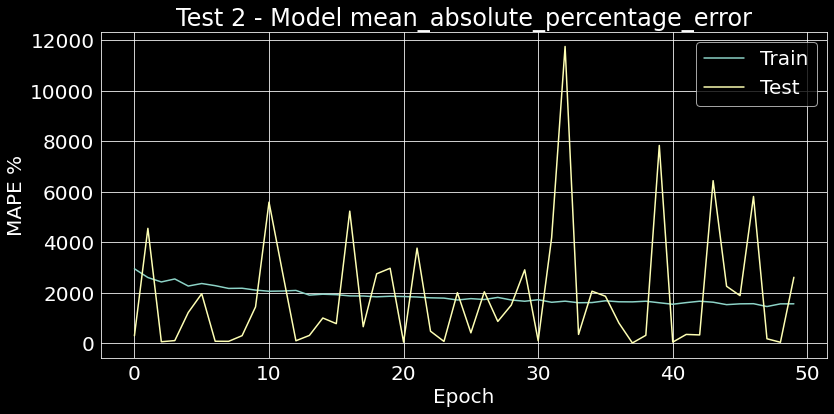

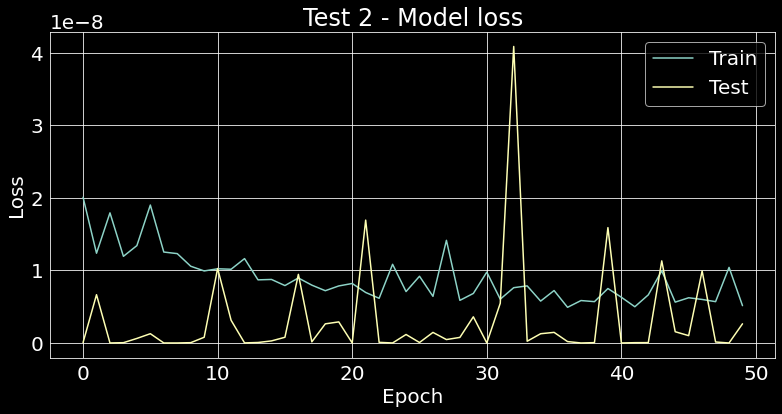

In [45]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [46]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

34860/34860 [==============================] - 25s 729us/step - loss: 2.6410e-09 - mean_absolute_percentage_error: 2583.6072
loss :  2.6409927578185943e-09
mean_absolute_percentage_error :  2583.607177734375


# Submission

In [47]:
y_hat = model.predict(x_val)
y_hat

array([[0.0002971 ],
       [0.00012198],
       [0.00082438],
       ...,
       [0.00092296],
       [0.00141651],
       [0.00054601]], dtype=float32)

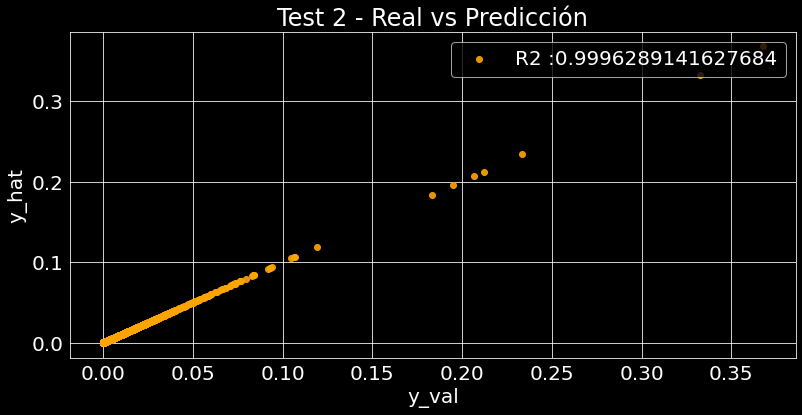

In [48]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 2 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [49]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.2,0.002177,0.001888,0.555556,0.0,0.0,1.000000,0.0,1.00,0.0,...,0.386555,0.000249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000297
1,0.2,0.002524,0.000000,0.000000,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.184874,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000122
2,0.4,0.002953,0.000000,0.555556,0.0,0.0,0.142857,0.0,0.00,0.4,...,0.403361,0.000778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000824
3,0.4,0.008627,0.000000,0.777778,0.0,0.0,0.428571,1.0,0.00,0.4,...,0.428571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000040
4,0.2,0.004638,0.003405,0.555556,0.0,0.0,0.000000,1.0,0.00,0.0,...,0.243697,0.000353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.2,0.011323,0.000000,0.555556,0.0,0.0,0.857143,0.0,1.00,0.0,...,0.411765,0.000304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000352
281662,0.2,0.005244,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.25,0.8,...,0.327731,0.001022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001073
281663,0.4,0.025575,0.000000,0.777778,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.226891,0.000878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000923
281664,0.2,0.008767,0.006988,0.555556,0.0,0.0,0.714286,0.0,0.75,0.0,...,0.344538,0.001411,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001417


In [50]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         168122.691900
1          69023.273757
2         466497.235325
3          22421.501673
4         229247.547241
              ...      
281661    199083.688398
281662    607359.868166
281663    522281.225555
281664    801567.054358
281665    308973.598737
Name: 31, Length: 281666, dtype: float64

In [51]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,168122.691900
1,12598#201902,69023.273757
2,23697#201902,466497.235325
3,23768#201902,22421.501673
4,7174#201902,229247.547241
...,...,...
281661,8596193#202011,199083.688398
281662,8616083#202011,607359.868166
281663,8670207#202011,522281.225555
281664,8677655#202011,801567.054358


In [52]:
n = 92
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN92.csv'

In [53]:
np.mean(sub['gasto_familiar'])

800366.0929361742

In [54]:
sub.to_csv(sub_name, index=False)

# Test 3

In [55]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


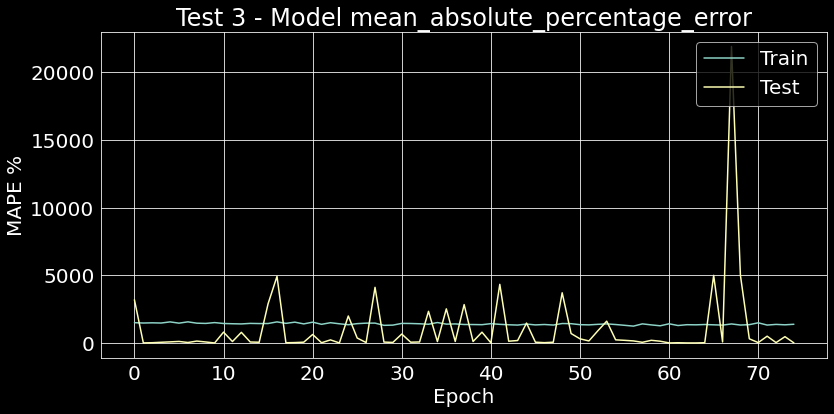

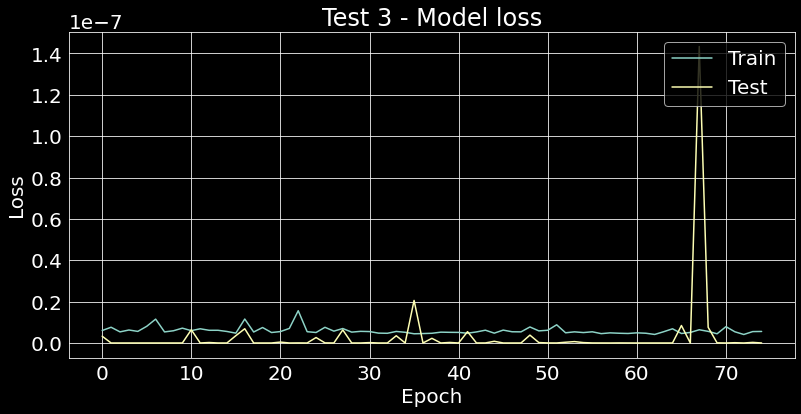

In [56]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [57]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

34860/34860 [==============================] - 25s 725us/step - loss: 1.2346e-13 - mean_absolute_percentage_error: 13.5310
loss :  1.2346241108456002e-13
mean_absolute_percentage_error :  13.53100872039795


## Submission

In [58]:
y_hat = model.predict(x_val)
y_hat

array([[2.4871144e-04],
       [6.5340777e-05],
       [7.7740918e-04],
       ...,
       [8.7739562e-04],
       [1.4115871e-03],
       [5.6164432e-04]], dtype=float32)

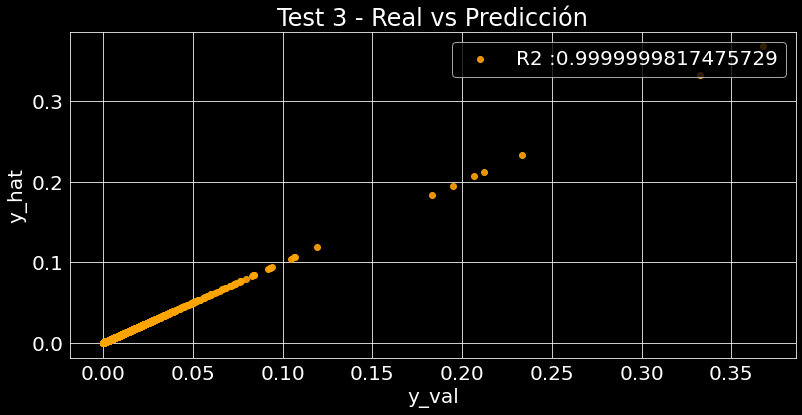

In [59]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 3 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [60]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.2,0.002177,0.001888,0.555556,0.0,0.0,1.000000,0.0,1.00,0.0,...,0.386555,0.000249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.487114e-04
1,0.2,0.002524,0.000000,0.000000,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.184874,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.534078e-05
2,0.4,0.002953,0.000000,0.555556,0.0,0.0,0.142857,0.0,0.00,0.4,...,0.403361,0.000778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.774092e-04
3,0.4,0.008627,0.000000,0.777778,0.0,0.0,0.428571,1.0,0.00,0.4,...,0.428571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.017478e-07
4,0.2,0.004638,0.003405,0.555556,0.0,0.0,0.000000,1.0,0.00,0.0,...,0.243697,0.000353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.531802e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.2,0.011323,0.000000,0.555556,0.0,0.0,0.857143,0.0,1.00,0.0,...,0.411765,0.000304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.040336e-04
281662,0.2,0.005244,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.25,0.8,...,0.327731,0.001022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.022519e-03
281663,0.4,0.025575,0.000000,0.777778,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.226891,0.000878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.773956e-04
281664,0.2,0.008767,0.006988,0.555556,0.0,0.0,0.714286,0.0,0.75,0.0,...,0.344538,0.001411,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.411587e-03


In [61]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         140739.378053
1          36974.657516
2         439915.769299
3           -114.163841
4         199855.562445
              ...      
281661    172044.743552
281662    578616.864951
281663    496495.513779
281664    798780.679298
281665    317820.011817
Name: 31, Length: 281666, dtype: float64

In [62]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,140739.378053
1,12598#201902,36974.657516
2,23697#201902,439915.769299
3,23768#201902,-114.163841
4,7174#201902,199855.562445
...,...,...
281661,8596193#202011,172044.743552
281662,8616083#202011,578616.864951
281663,8670207#202011,496495.513779
281664,8677655#202011,798780.679298


In [63]:
n = 93
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN93.csv'

In [64]:
np.mean(sub['gasto_familiar'])

776211.2446514763

In [65]:
sub.to_csv(sub_name, index=False)

# Test 4

In [66]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


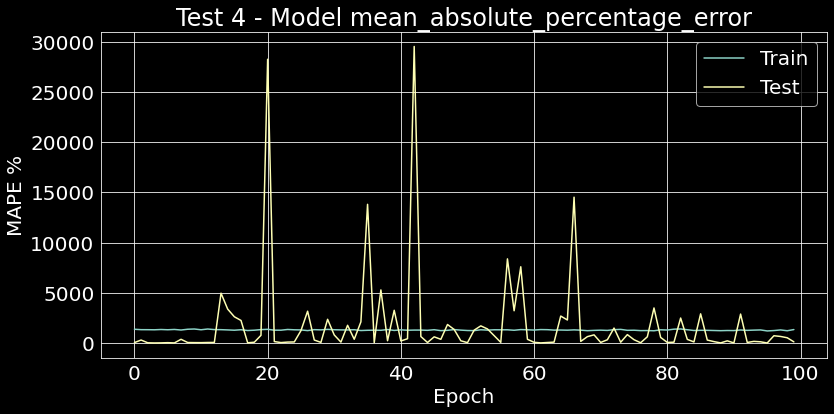

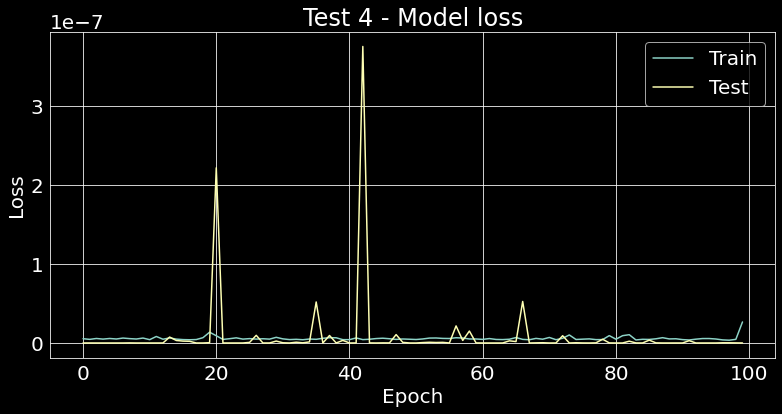

In [67]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [68]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

34860/34860 [==============================] - 25s 711us/step - loss: 6.7370e-12 - mean_absolute_percentage_error: 117.4774
loss :  6.736996811113061e-12
mean_absolute_percentage_error :  117.4774398803711


## Submission

In [69]:
y_hat = model.predict(x_val)
y_hat

array([[2.4593197e-04],
       [6.7081070e-05],
       [7.7551813e-04],
       ...,
       [8.7649969e-04],
       [1.4107978e-03],
       [5.5723573e-04]], dtype=float32)

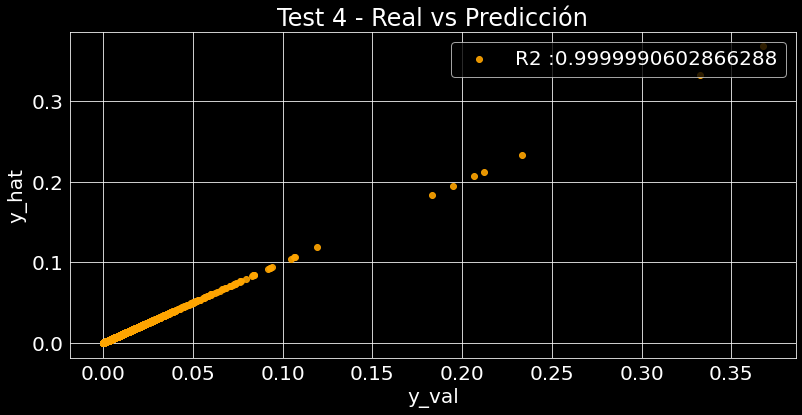

In [70]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 4 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [71]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.2,0.002177,0.001888,0.555556,0.0,0.0,1.000000,0.0,1.00,0.0,...,0.386555,0.000249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000246
1,0.2,0.002524,0.000000,0.000000,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.184874,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000067
2,0.4,0.002953,0.000000,0.555556,0.0,0.0,0.142857,0.0,0.00,0.4,...,0.403361,0.000778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000776
3,0.4,0.008627,0.000000,0.777778,0.0,0.0,0.428571,1.0,0.00,0.4,...,0.428571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000003
4,0.2,0.004638,0.003405,0.555556,0.0,0.0,0.000000,1.0,0.00,0.0,...,0.243697,0.000353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.2,0.011323,0.000000,0.555556,0.0,0.0,0.857143,0.0,1.00,0.0,...,0.411765,0.000304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000303
281662,0.2,0.005244,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.25,0.8,...,0.327731,0.001022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001023
281663,0.4,0.025575,0.000000,0.777778,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.226891,0.000878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000876
281664,0.2,0.008767,0.006988,0.555556,0.0,0.0,0.714286,0.0,0.75,0.0,...,0.344538,0.001411,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001411


In [72]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         139166.545518
1          37959.444163
2         438845.672685
3          -1886.832505
4         200289.786887
              ...      
281661    171456.368281
281662    578748.551920
281663    495988.528828
281664    798334.037150
281665    315325.304619
Name: 31, Length: 281666, dtype: float64

In [73]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,139166.545518
1,12598#201902,37959.444163
2,23697#201902,438845.672685
3,23768#201902,-1886.832505
4,7174#201902,200289.786887
...,...,...
281661,8596193#202011,171456.368281
281662,8616083#202011,578748.551920
281663,8670207#202011,495988.528828
281664,8677655#202011,798334.037150


In [74]:
n = 94
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN94.csv'

In [75]:
np.mean(sub['gasto_familiar'])

776033.0067646599

In [76]:
sub.to_csv(sub_name, index=False)

# Test 5

In [77]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



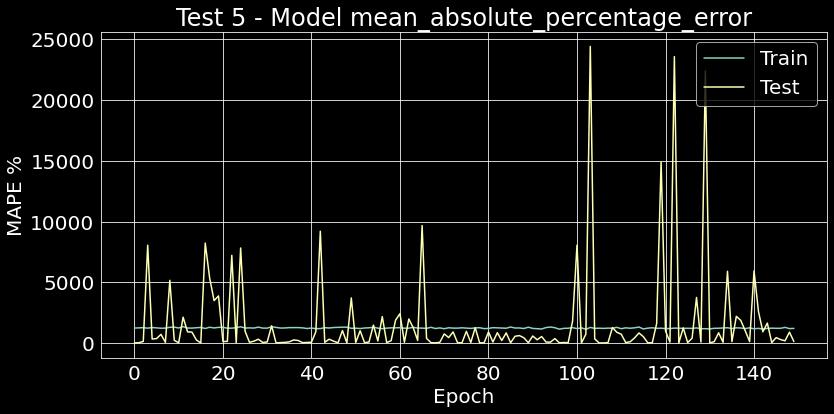

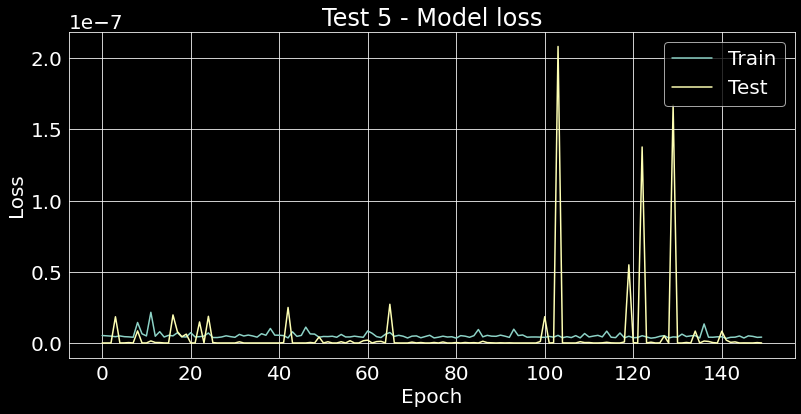

In [78]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [79]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

34860/34860 [==============================] - 25s 713us/step - loss: 5.8262e-12 - mean_absolute_percentage_error: 131.1022
loss :  5.826186321583604e-12
mean_absolute_percentage_error :  131.10220336914062


# Submission

In [80]:
y_hat = model.predict(x_val)
y_hat

array([[2.4632504e-04],
       [6.3085696e-05],
       [7.7485788e-04],
       ...,
       [8.7521167e-04],
       [1.4087632e-03],
       [5.5957783e-04]], dtype=float32)

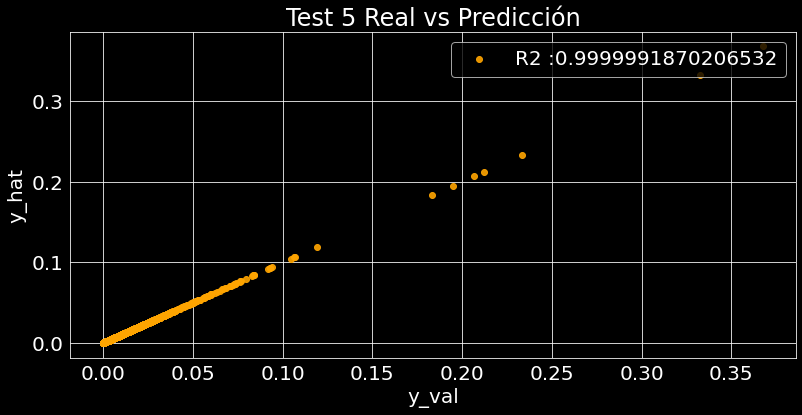

In [81]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 5 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [82]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.2,0.002177,0.001888,0.555556,0.0,0.0,1.000000,0.0,1.00,0.0,...,0.386555,0.000249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000246
1,0.2,0.002524,0.000000,0.000000,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.184874,0.000065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000063
2,0.4,0.002953,0.000000,0.555556,0.0,0.0,0.142857,0.0,0.00,0.4,...,0.403361,0.000778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000775
3,0.4,0.008627,0.000000,0.777778,0.0,0.0,0.428571,1.0,0.00,0.4,...,0.428571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000002
4,0.2,0.004638,0.003405,0.555556,0.0,0.0,0.000000,1.0,0.00,0.0,...,0.243697,0.000353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.2,0.011323,0.000000,0.555556,0.0,0.0,0.857143,0.0,1.00,0.0,...,0.411765,0.000304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000301
281662,0.2,0.005244,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.25,0.8,...,0.327731,0.001022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001020
281663,0.4,0.025575,0.000000,0.777778,0.0,0.0,0.285714,0.0,0.00,0.4,...,0.226891,0.000878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000875
281664,0.2,0.008767,0.006988,0.555556,0.0,0.0,0.714286,0.0,0.75,0.0,...,0.344538,0.001411,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001409


In [83]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         139388.977260
1          35698.565328
2         438472.054552
3          -1361.599785
4         198611.255631
              ...      
281661    170494.803074
281662    577299.534122
281663    495259.672085
281664    797182.714907
281665    316650.639434
Name: 31, Length: 281666, dtype: float64

In [84]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,139388.977260
1,12598#201902,35698.565328
2,23697#201902,438472.054552
3,23768#201902,-1361.599785
4,7174#201902,198611.255631
...,...,...
281661,8596193#202011,170494.803074
281662,8616083#202011,577299.534122
281663,8670207#202011,495259.672085
281664,8677655#202011,797182.714907


In [85]:
n = 95
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN95.csv'

In [86]:
np.mean(sub['gasto_familiar'])

774857.2695394399

In [87]:
sub.to_csv(sub_name, index=False)